# Project on Exploratory Data Analysis ( Most Streamed Spotify Songs 2023 )
####  (https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023).


#### Importing the Libraries that will be used for the Said Project


In [3]:
# importing the libraries
import pandas as pd
import matplotlib.pyplot as plt

#### Reading the File Obtained from Kaggle

In [4]:
# reading the file and using encoding to read the said csv
df = pd.read_csv('spotify-2023.csv', encoding='ISO-8859-1')
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [4]:
# getting all the columns for better view what are we talking or talking about
df.columns

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

## Overview of Dataset

#### Getting the Number of Rows and Columns

In [13]:
# assigning values of shape to columns and rows
columns, rows = df.shape
print('The Number of Columns: ', str(columns))
print('The Number of Rows: ', str(rows))


The Number of Columns:  953
The Number of Rows:  24


#### Getting all the Dtypes and Missing Values

In [33]:
# naming the data frame and reseting the index
data= pd.DataFrame(df.dtypes, columns=['Data Type']).reset_index()
data.columns = ['Column Name', 'Data Type']

#getting all the missing values
missing_values = df.isnull().sum().reset_index()
missing_values.columns = ['Column Name', 'Missing Count']

# merging all the data who has missing count and counting the missing values
summary_1= data.merge(missing_values)
summary_1

,Column Name,Data Type,Missing Count
0,track_name,object,0
1,artist(s)_name,object,0
2,artist_count,int64,0
3,released_year,int64,0
4,released_month,int64,0
5,released_day,int64,0
6,in_spotify_playlists,int64,0
7,in_spotify_charts,int64,0
8,streams,object,0
9,in_apple_playlists,int64,0


## Basic Descriptive Statistics

#### Getting the Mean, Median, and Standard Deviation of the Streams Column

In [35]:
# making the streams columns into numberic numbers for it to change or to add
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

# getting the mean median and mstandard deviation
summary_2 = pd.DataFrame({'Variable': ['Mean', 'Median', 'Standard Deviation'],'Value': [df['streams'].mean(), df['streams'].median(), df['streams'].std()]})
summary_2


,Variable,Value
0,Mean,5.141374e+08
1,Median,2.905309e+08
2,Standard Deviation,5.668569e+08


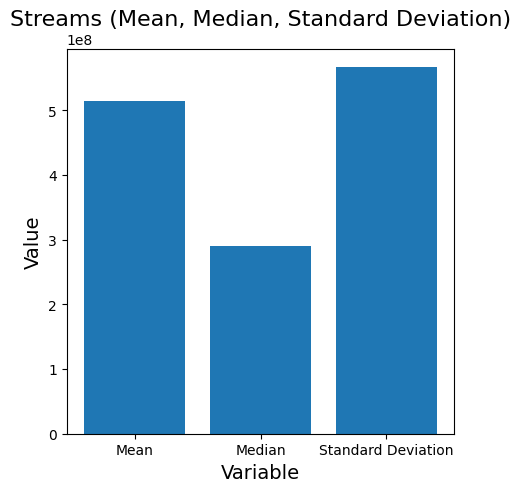

In [36]:
# making the size of the figure
plt.figure(figsize=(5, 5))
#making the bar graph
plt.bar(summary_2['Variable'], summary_2['Value'])

# naming the graph and assigning name to its x and y axis
plt.title('Streams (Mean, Median, Standard Deviation)', fontsize = 16)
plt.xlabel('Variable', fontsize = 14)
plt.ylabel('Value', fontsize = 14)
# output of the code
plt.show()

#### What is the distribution of released_year and artist_count

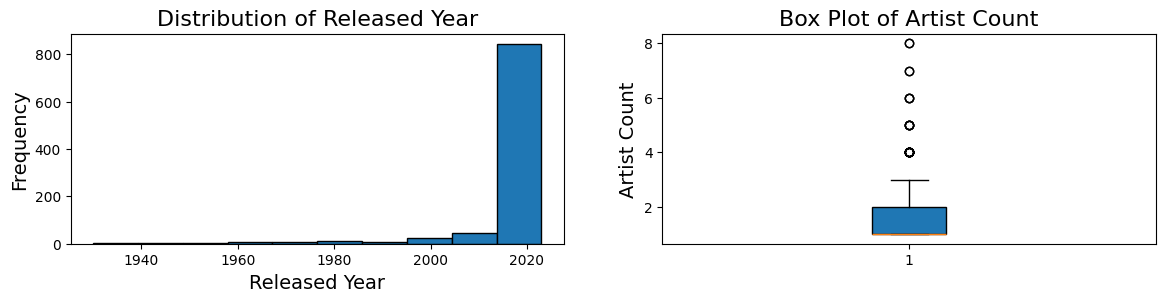

In [22]:
# Making the Figure or its fig size
plt.figure(figsize=(14, 6))
# making a subplot that holds the distribution of released song each year
plt.subplot(2, 2, 1)
plt.hist(df['released_year'], edgecolor='black')
plt.title('Distribution of Released Year', fontsize=16)
plt.xlabel('Released Year', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
#making another subplot of a boxplot on the artist count and 
plt.subplot(2, 2, 2)
plt.boxplot(df['artist_count'], vert=True, patch_artist=True)
plt.title('Box Plot of Artist Count', fontsize=16)
plt.ylabel('Artist Count', fontsize=14)
#output of the plot

plt.show()

#### Determining The Outliers

In [83]:
# determining the outliers of the artist count
Q1 = df['artist_count'].quantile(0.25)
Q3 = df['artist_count'].quantile(0.75)
iden = Q3 - Q1

low = Q1-1.5*iden
up = Q3+1.5*iden 
# getting the outliers
outliers = df[(df['artist_count'] < low) | (df['artist_count'] > up)]
# outputting the name of outliers of the artist count
summary_3 = outliers[['track_name', 'artist(s)_name', 'artist_count']].sort_values('artist_count').reset_index(drop=True)
summary_3

,track_name,artist(s)_name,artist_count
0,Tubarï¿½ï¿½o Te,"Dj LK da Escï¿½ï¿½cia, Tchakabum, mc jhenny, M",4
1,La Llevo Al Cielo (Ft. ï¿½ï¿½engo F,"Nengo Flow, Anuel Aa, Chris Jedi, Chencho Corl...",4
2,Cash In Cash Out,"Pharrell Williams, Tyler, The Creator, 21 Savage",4
3,sentaDONA (Remix) s2,"Luï¿½ï¿½sa Sonza, MC Frog, Dj Gabriel do Borel...",4
4,Friday (feat. Mufasa & Hypeman) - Dopamine Re-...,"Riton, Nightcrawlers, Mufasa & Hypeman, Dopamine",4
5,OUT OUT (feat. Charli XCX & Saweetie),"Charli XCX, Jax Jones, Joel Corry, Saweetie",4
6,Entre Nosotros (Remix) [con Nicki Nicole],"Lit Killah, Maria Becerra, Tiago pzk, NICKI NI...",4
7,"Stay With Me (with Justin Timberlake, Halsey, ...","Calvin Harris, Halsey, Pharrell Williams, Just...",4
8,Happy Xmas (War Is Over),"John Lennon, The Harlem Community Choir, The P...",4
9,BABY OTAKU,"Fran C, Polima WestCoast, Nickoog Clk, Pablito...",4


## Top Performers

#### Top 5 Most Streamed

In [97]:
# getting the top track and their number of streams and the artist
top = df[['track_name', 'artist(s)_name', 'streams']].sort_values('streams', ascending=False).head().reset_index(drop=True)
top



,track_name,artist(s)_name,streams
0,Blinding Lights,The Weeknd,3.703895e+09
1,Shape of You,Ed Sheeran,3.562544e+09
2,Someone You Loved,Lewis Capaldi,2.887242e+09
3,Dance Monkey,Tones and I,2.864792e+09
4,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2.808097e+09


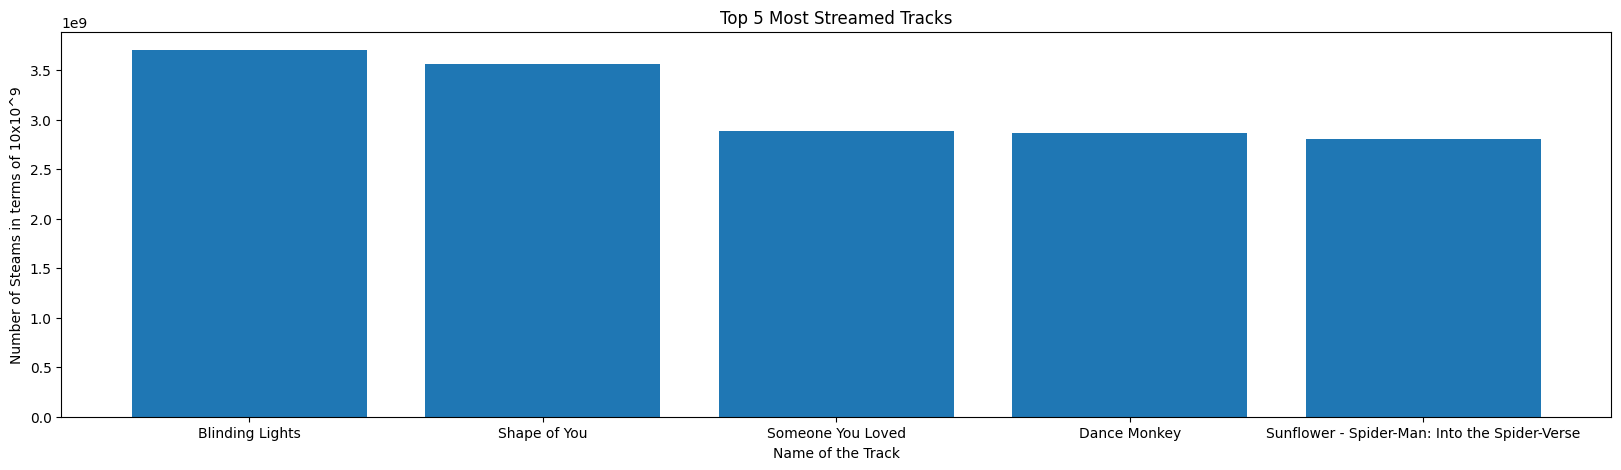

In [129]:
# Getting the Graph of the 5most streamed trakcs
plt.figure(figsize=(20, 5))
plt.bar(top_streamed_summary['track_name'], top_streamed_summary['streams'])
#labeling the X y and its title
plt.xlabel('Name of the Track')
plt.ylabel('Number of Steams in terms of 10x10^9')
plt.title('Top 5 Most Streamed Tracks')
# output of the graph
plt.show()

#### Top 5 most frequent Artists based on the Number of Tracks

In [116]:
# getting the top artist in terms of track produced
Tartist = df['artist(s)_name'].value_counts().head().reset_index()
# getting its columns
Tartist.columns = ['artist(s)_name', 'track_count']
# output of the code
Tartist


,artist(s)_name,track_count
0,Taylor Swift,34
1,The Weeknd,22
2,Bad Bunny,19
3,SZA,19
4,Harry Styles,17


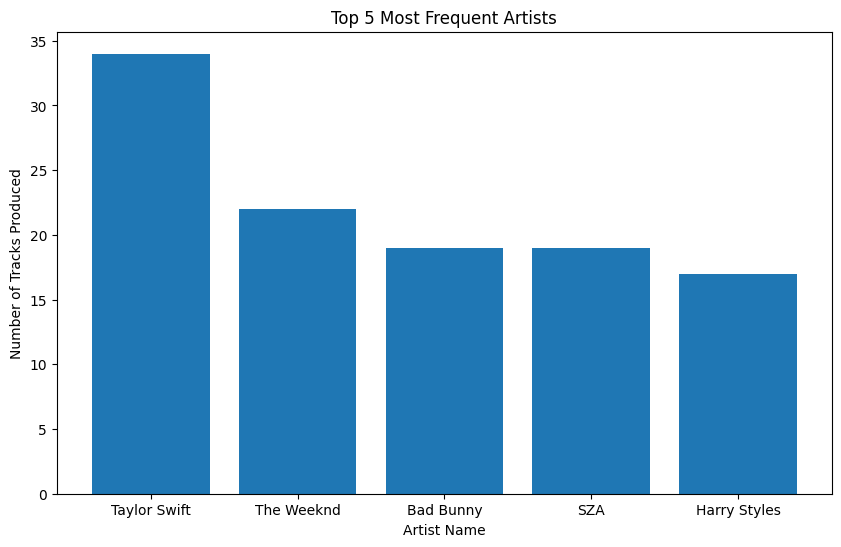

In [130]:
# getting the Graph of 5 most track
plt.figure(figsize=(10, 6))
plt.bar(Tartist['artist(s)_name'], Tartist['track_count'])
# labeling the graph 
plt.xlabel('Artist Name')
plt.ylabel('Number of Tracks Produced')
plt.title('Top 5 Most Frequent Artists')
# showing or output the graph
# output the graph
plt.show()

## Temporal Trends

#### Trends in the Number of Tracks Released Over Time.

In [149]:
# getting the track count on each year
track= df['released_year'].value_counts().sort_index().reset_index()
track.columns = ['released_year', 'track_count']
# set index as the released year ofr better visualization
track.set_index('released_year')

,track_count
released_year,
1930,1
1942,1
1946,1
1950,1
1952,1
1957,2
1958,3
1959,2
1963,3


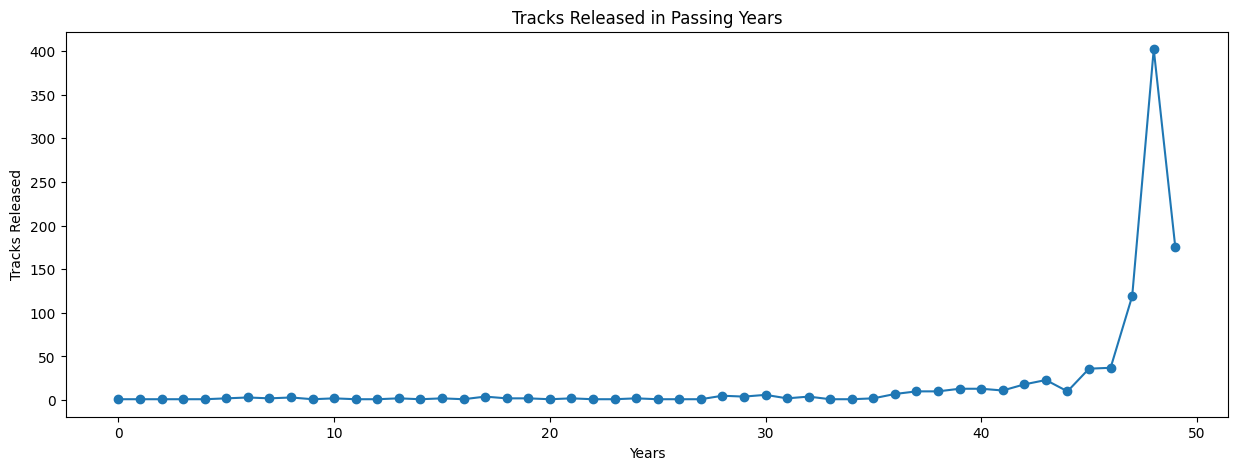

In [166]:
# building a line graph where we show the relationship of the number of track in a year
plt.figure(figsize=(15, 5)) 
#making a marker 
plt.plot(track.index, track['track_count'], marker='o')
plt.xlabel('Years')
plt.ylabel('Tracks Released')
plt.title('Tracks Released in Passing Years')

#showing the nu ber of plot
plt.show()

#### Number of Tracks Released per Month

In [188]:
# making a groupby function to count all of the released track in a month
df.groupby("released_month")["released_month"].count()


released_month
1     134
2      61
3      86
4      66
5     128
6      86
7      62
8      46
9      56
10     73
11     80
12     75
Name: released_month, dtype: int64

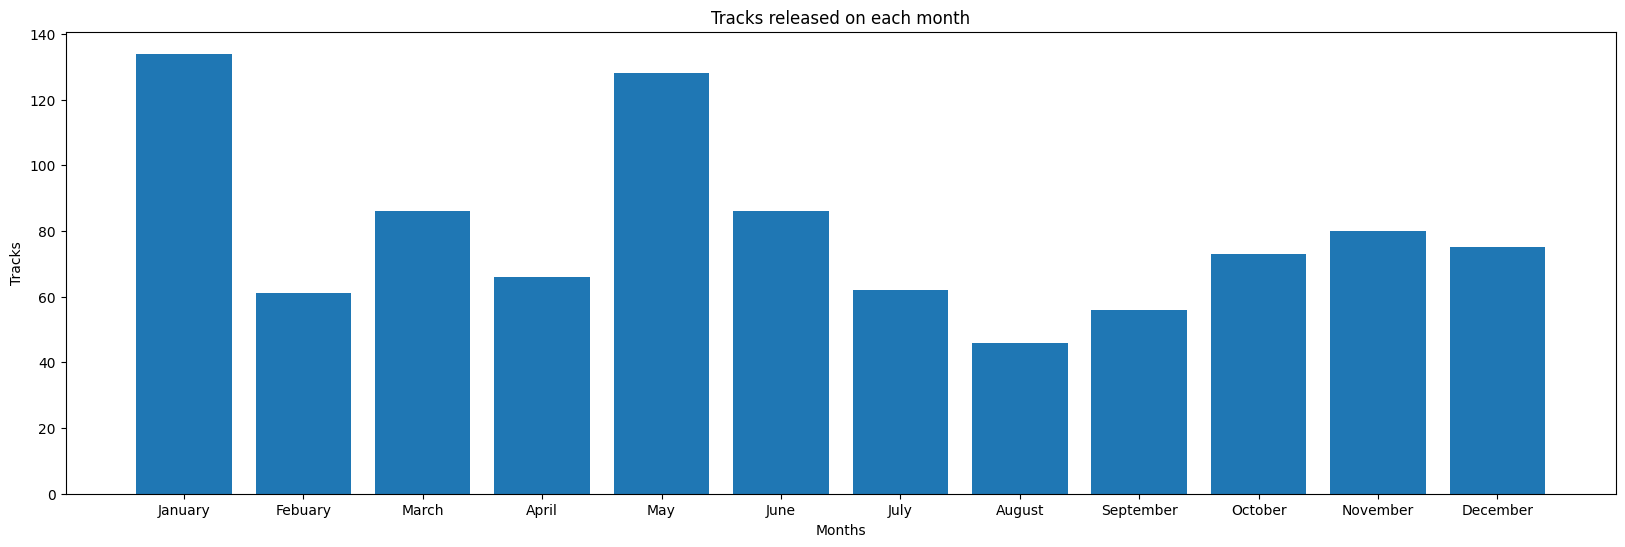

In [208]:
# making the graph in each month where the number of tracks of produced are seen
months = ["January", "Febuary", "March", "April", "May", "June", "July", "August", "September", "October","November","December"]
x = pd.Series(months)
y = df.groupby("released_month")["released_month"].count().tolist()
# assignign the values to the bar graph
plt.figure(figsize=(20, 6))
plt.bar(x,y)
plt.xlabel('Months')
plt.ylabel('Tracks')
plt.title('Tracks released on each month')
# showing the graph and outputting it
plt.show()

## Genre and Music Characteristics

#### Correlation between Streams and Musical attributes

In [257]:
# making a list where all of the attributes are stored
M_at = ['bpm', 'key', 'mode', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'streams']
# making all the inside the m_at be numeric for it to be altered or add upon
for ats in M_at:
    df[ats] = pd.to_numeric(df[ats], errors='coerce')
# initializing the set
cor_res = {}

# correlating all of the attributes to musoc
for ats in M_at[:-1]: cor_res[ats + ' vs Streams'] = df[ats].corr(df['streams'])
cor_d = pd.DataFrame(cor_res.items(), columns=['Attribute', 'Correlation Coefficient'])
# output the variable
cor_d

,Attribute,Correlation Coefficient
0,bpm vs Streams,-0.002438
1,key vs Streams,0.007695
2,mode vs Streams,0.042635
3,danceability_% vs Streams,-0.105457
4,valence_% vs Streams,-0.040831
5,energy_% vs Streams,-0.026051
6,acousticness_% vs Streams,-0.004485
7,instrumentalness_% vs Streams,-0.044902
8,liveness_% vs Streams,-0.048337
9,speechiness_% vs Streams,-0.112333


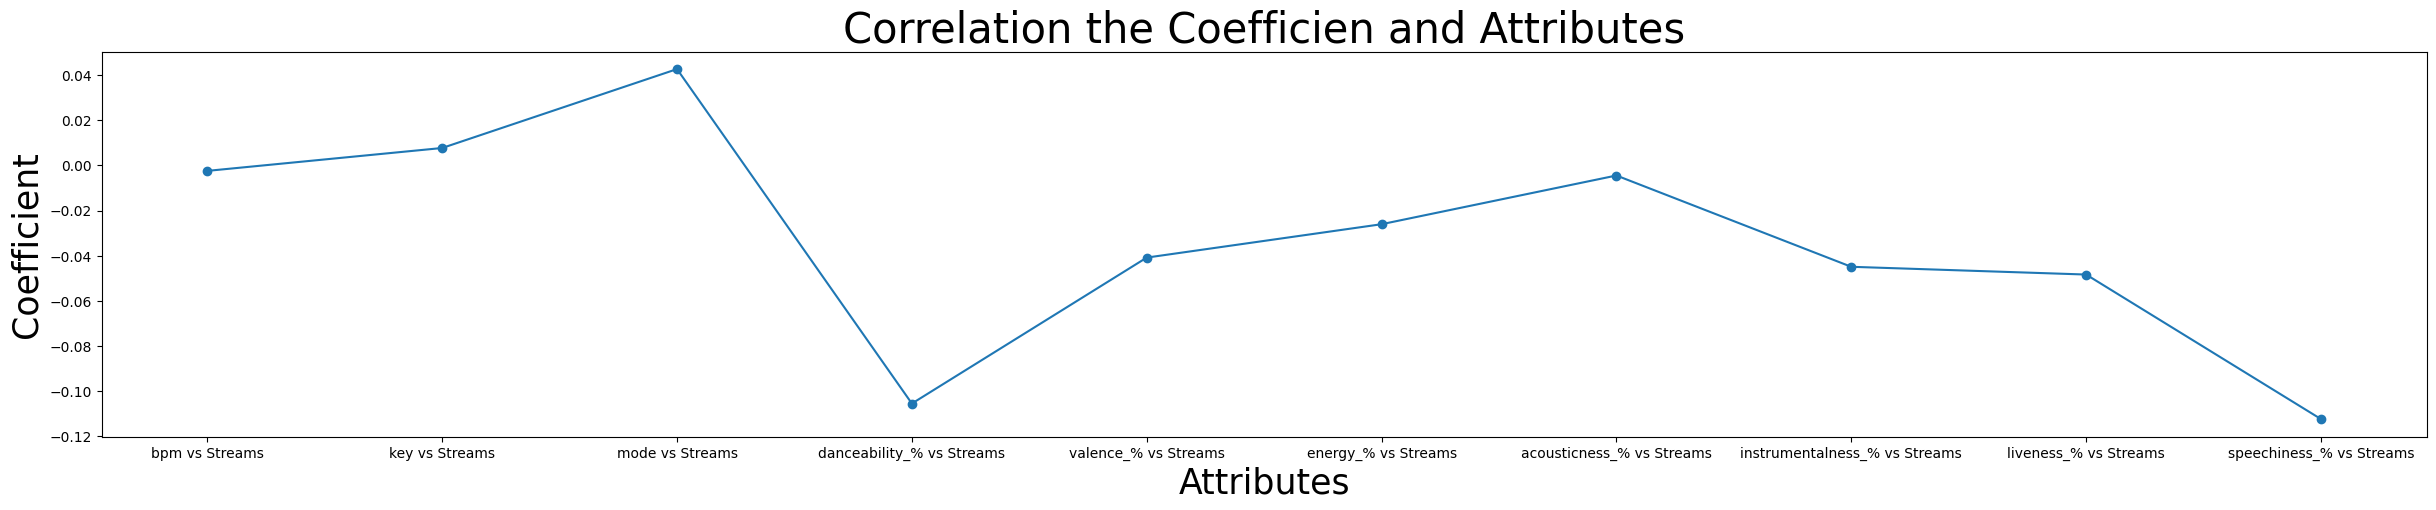

In [267]:
# Making a line graph for the correlation of each attribute to music
plt.figure(figsize=(30, 5))
# making a marker for better visualization
plt.plot(cor_d['Attribute'], cor_d['Correlation Coefficient'], marker='o')

# naming the x and y values
plt.xlabel('Attributes', fontsize = 25)
plt.ylabel('Coefficient', fontsize = 25)
plt.title('Correlation the Coefficien and Attributes', fontsize = 30)

#outputting the graph
plt.show()

#### correlation between Danceability and Energy How about Valence and Acousticness

In [6]:
# Making the variables to correlate 
atib = ['danceability_%', 'energy_%', 'valence_%', 'acousticness_%']

# Making for loop in each attribute for it to be numerical value and can be alter
for attr in atib:
    df[attr] = pd.to_numeric(df[attr], errors='coerce')

# making the correlation 
corr1 = df['danceability_%'].corr(df['energy_%'])
corr2 = df['valence_%'].corr(df['acousticness_%'])

# Merging the correlation 1 and 2
corres = {'Danceability vs Energy': corr1,'Valence vs Acousticness': corr2}
# Making the dataframe
rescor = pd.DataFrame(corres, index=['Correlation Coefficient']).T
# output the code
rescor

,Correlation Coefficient
Danceability vs Energy,0.198095
Valence vs Acousticness,-0.081907


## Platform Popularity

#### Which platform seems to favor the most popular tracks

In [3]:
# Making the count and making them numeric for them to be used to get their sum
count1 = pd.to_numeric(df['in_spotify_playlists'], errors='coerce').sum()
count2 = pd.to_numeric(df['in_deezer_playlists'], errors='coerce').sum()
count3 = pd.to_numeric(df['in_apple_playlists'], errors='coerce').sum()
# making them a data fram to for them to be outputted 
plat_res = pd.DataFrame({'platform': ['in_spotify_playlists', 'in_deezer_playlists', 'in_apple_playlists'],'track_count': [count1, count2, count3]})
#output the Data Frame
plat_res


,platform,track_count
0,in_spotify_playlists,4955719.0
1,in_deezer_playlists,95913.0
2,in_apple_playlists,64625.0


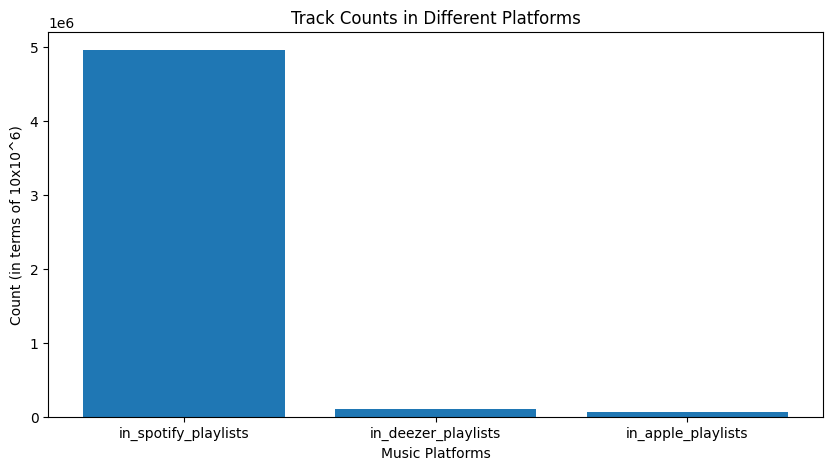

In [4]:
# making the Barplot for the Popularity
plt.figure(figsize=(10, 5))
plt.bar(plat_res['platform'], plat_res['track_count'])

# naming the label 
plt.xlabel('Music Platforms')
plt.ylabel('Count (in terms of 10x10^6)')
plt.title('Track Counts in Different Platforms')
# output the code
plt.show()

##  Advanced Analysis

#### Major vs. Minor

In [15]:
# count all of the each key and mode 
counts= df.groupby(['key', 'mode']).size().reset_index(name='track_count')

# output the code
counts


,key,mode,track_count
0,A,Major,42
1,A,Minor,33
2,A#,Major,27
3,A#,Minor,30
4,B,Major,35
5,B,Minor,46
6,C#,Major,73
7,C#,Minor,47
8,D,Major,66
9,D,Minor,15


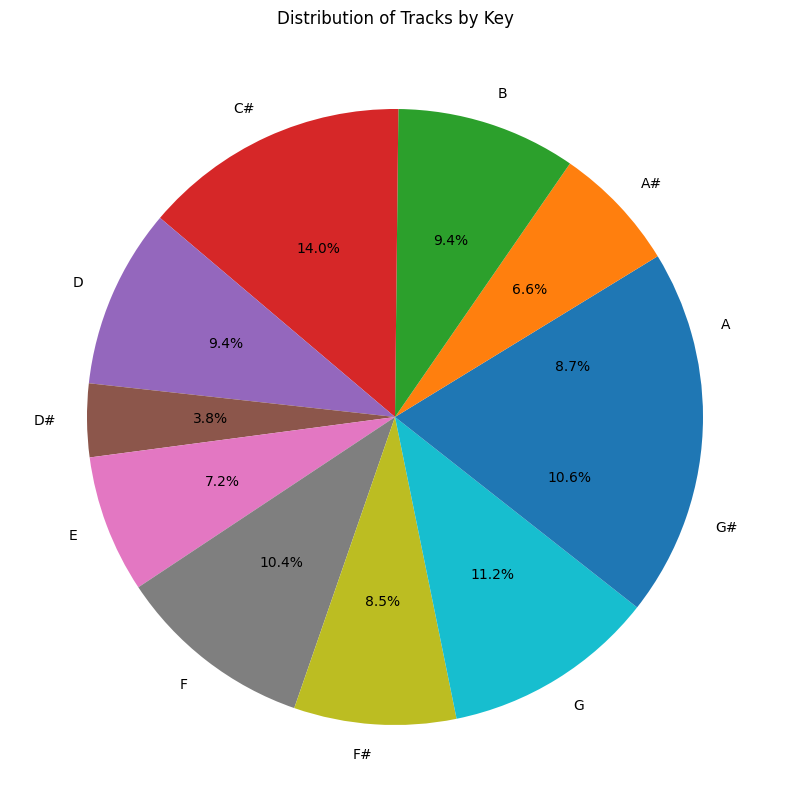

In [19]:
# making the count and making it a pie graph
key_counts = counts.groupby('key')['track_count'].sum()
plt.figure(figsize=(10, 10))
# labeling them and finding therepercentage on the graph
plt.pie(key_counts, labels=key_counts.index, autopct='%1.1f%%')
# naming the title
plt.title('Distribution of Tracks by Key')

#output the pie graph
plt.show()

In [330]:
# grouping all of the track major or minor
Mtotal= key_mode_counts.groupby('mode')['track_count'].sum().reset_index()
# output of the code
Mtotal

,mode,track_count
0,Major,475
1,Minor,383


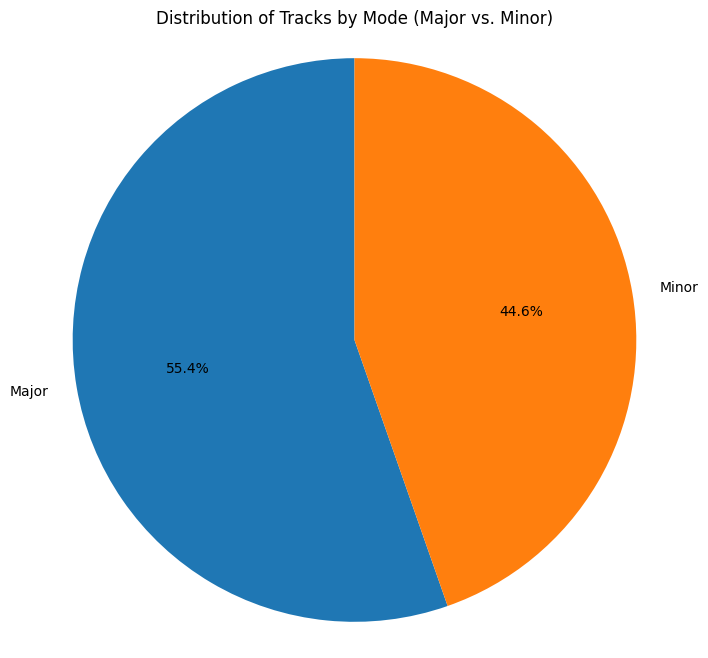

In [334]:
# Making the graph and grouping the tracks major or minor
mode_counts = counts.groupby('mode')['track_count'].sum()
# making the pie graph
plt.figure(figsize=(8, 8))
# LABELING HOW MANY PERCENTAGE IS THE MAJOR AND THE MINIR
plt.pie(mode_counts, labels=mode_counts.index, autopct='%1.1f%%', startangle=90)
# outputting and labelling the pie graph
plt.title('Distribution of Tracks by Mode (Major vs. Minor)')
plt.show()

#### Artists consistently appear in more playlists or charts

#### Spotify Playlist

In [38]:
# getting the top artist in spotify playlist
artist_spotify_counts = df.groupby('artist(s)_name')['in_spotify_playlists'].sum().reset_index()
# sorting the top by last to get the highest value
top_artists_spotify = artist_spotify_counts.sort_values(by='in_spotify_playlists', ascending=False).head(10)
# output of the top in spotify
top_artists_spotify.reset_index()


,index,artist(s)_name,in_spotify_playlists
0,572,The Weeknd,144053
1,558,Taylor Swift,132974
2,159,Ed Sheeran,128758
3,223,Harry Styles,110026
4,171,Eminem,87331
5,25,Arctic Monkeys,84016
6,111,Coldplay,75716
7,33,Avicii,68241
8,141,"Dr. Dre, Snoop Dogg",65728
9,7,Adele,65049


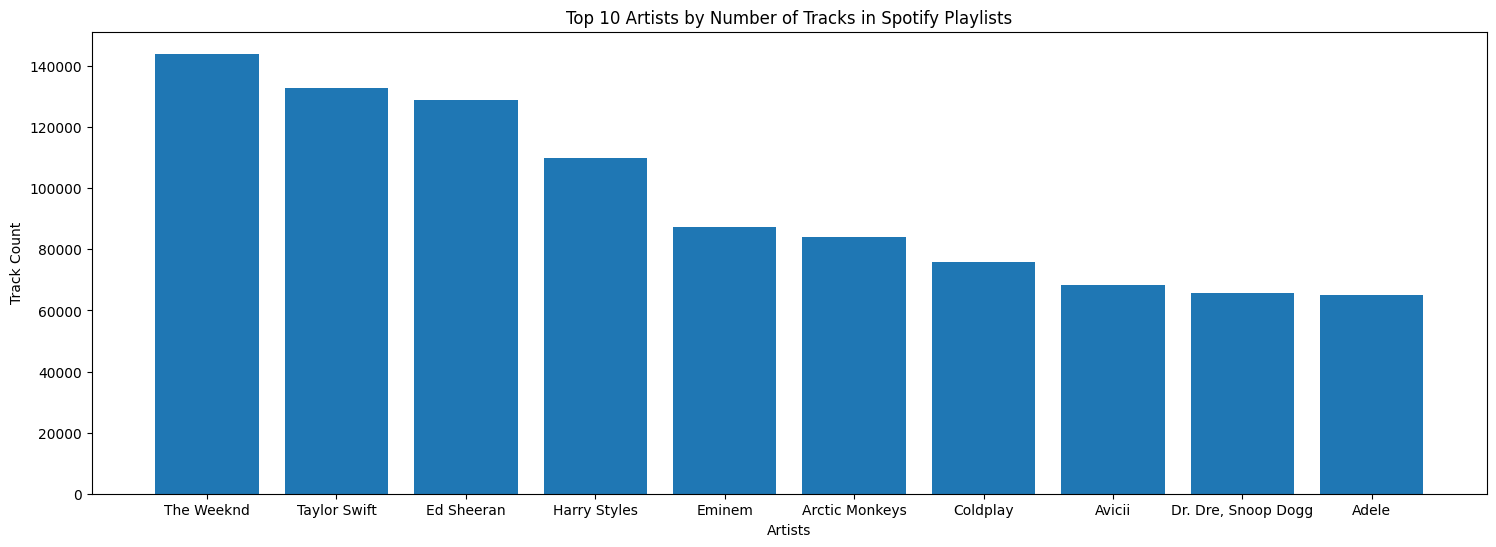

In [39]:
# labeling the x and y values in terms of the name of the artist and their value in spotify
artists = top_artists_spotify['artist(s)_name']
track_counts = top_artists_spotify['in_spotify_playlists']
# making the bar graph
plt.figure(figsize=(18, 6))
plt.bar(artists, track_counts)
plt.title('Top 10 Artists by Number of Tracks in Spotify Playlists')
plt.ylabel('Track Count')
plt.xlabel('Artists')
#output the graph
plt.show()

#### Deezer Playlist

In [7]:
# getting the top on deezer playlist
artist_deezer_counts = df.groupby('artist(s)_name')['in_deezer_playlists'].sum().reset_index()

# making the numeric value for it to be mutable
artist_deezer_counts['in_deezer_playlists'] = pd.to_numeric(artist_deezer_counts['in_deezer_playlists'], errors='coerce')
# getting the sample of 10 for it 
top_artists_deezer = artist_deezer_counts.sort_values(by='in_deezer_playlists', ascending=False).head(10)
# output the code
top_artists_deezer.reset_index()



,index,artist(s)_name,in_deezer_playlists
0,43,Bad Bunny,8.713943e+36
1,498,SZA,1.614215e+28
2,431,Olivia Rodrigo,9.146149e+17
3,319,Labrinth,5.110280e+16
4,38,BTS,2.522358e+16
5,179,Feid,5.234452e+14
6,135,Doja Cat,4.631507e+14
7,143,"Drake, 21 Savage",5.842157e+12
8,403,Mï¿½ï¿½ne,9.644342e+11
9,60,Billie Eilish,9.565283e+11


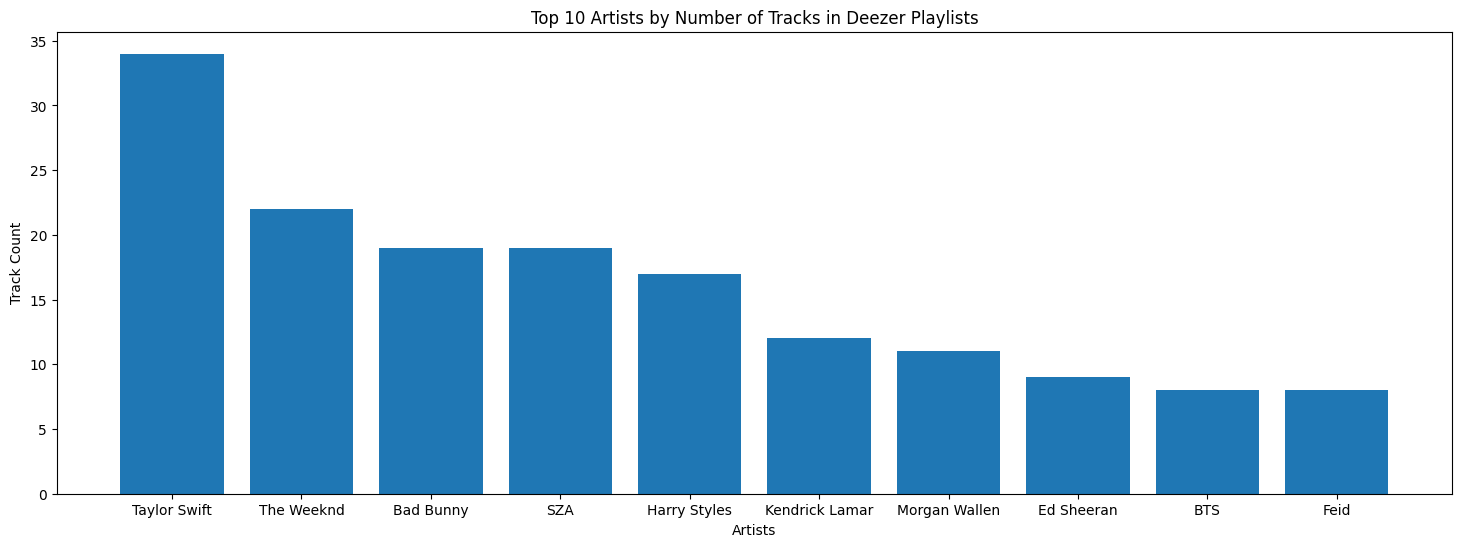

In [43]:
#Getting the top and counting all the number of track
artist_counts_deezer = df['artist(s)_name'].value_counts()
#getting the sample of a 10
tartist2 = artist_counts_deezer.head(10)
artists = tartist2.index
track_counts = top_10_artists.values
# plotting the bar graph
plt.figure(figsize=(18, 6))
plt.bar(artists, track_counts)
plt.title('Top 10 Artists by Number of Tracks in Deezer Playlists')
plt.ylabel('Track Count')
plt.xlabel('Artists')

#output the Graph
plt.show()

#### Apple Playlists

In [40]:
#getting all of the apple counts and getting a sample of 10
top_artists_apple = artist_apple_counts.sort_values(by='in_apple_playlists', ascending=False).head(10)
top_artists_apple.reset_index()

,index,artist(s)_name,in_apple_playlists
0,558,Taylor Swift,1796
1,223,Harry Styles,1741
2,572,The Weeknd,1677
3,159,Ed Sheeran,1448
4,151,Dua Lipa,765
5,331,Lewis Capaldi,738
6,431,Olivia Rodrigo,710
7,498,SZA,680
8,7,Adele,646
9,270,Justin Bieber,591


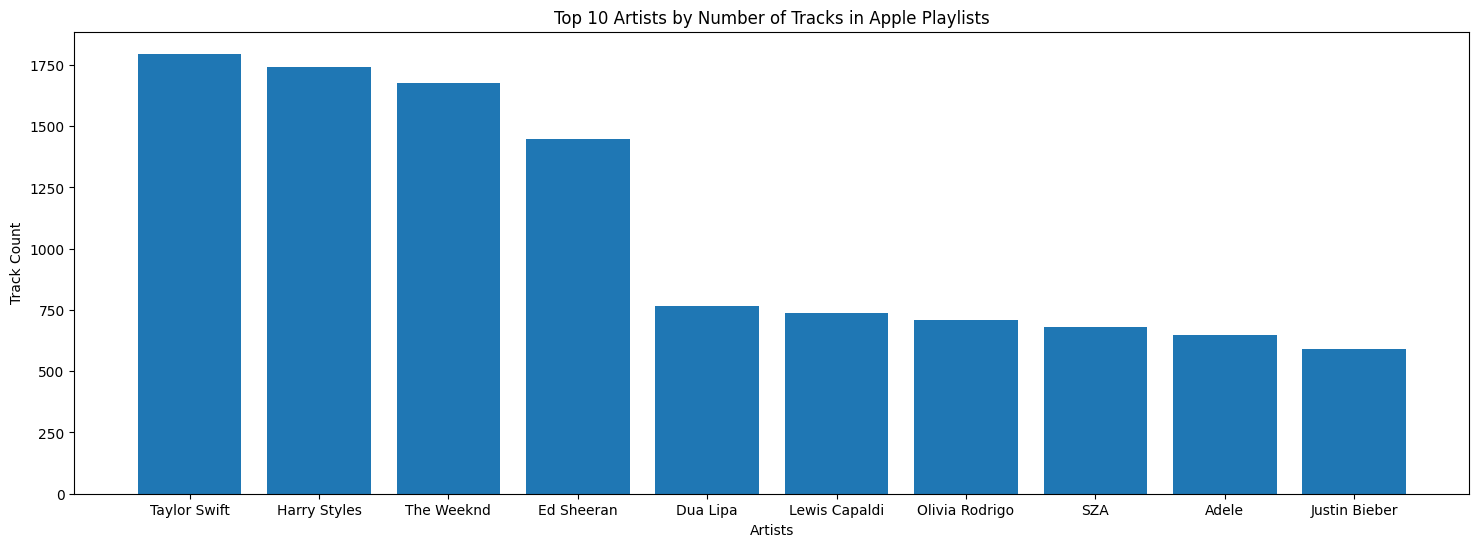

In [42]:
# labeling for it to be used as x and y for the apple playlsit
artists = top_artists_apple['artist(s)_name']
track_counts = top_artists_apple['in_apple_playlists']

# plotting and naming the bar graph
plt.figure(figsize=(18, 6))
plt.bar(artists, track_counts)
plt.title('Top 10 Artists by Number of Tracks in Apple Playlists')
plt.ylabel('Track Count')
plt.xlabel('Artists')
# output in the apple playlist
plt.show()